In [54]:
#Load data manipulation packages
library(tidyverse)
library(ggplot2)

#Load time series library
library(forecast)
library(tseries)
library(TSA)

#Library to detrend data using ols
library(pracma)
library(SpecsVerification)

In [70]:
#Function to adjust plot dimensions
set_plot_dimensions = function(width_choice=12, height_choice=6) {
    
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
    
        }

In [55]:
#Read data in
dat = read.csv('bike_sharing_hourly.csv')

In [56]:
#Convert date column from type string to type date
dat[,'dteday'] = as.Date(dat[,'dteday'])

In [57]:
#Create train and test splits
train = dat[dat[,'dteday'] >= '2011-01-01' & dat[,'dteday'] < '2012-10-31', ]
test = dat[dat[,'dteday'] >= '2012-11-01', ]

In [74]:
#Compute optimal box cox transformation to use to stabilize variance
lambda1 = BoxCox.lambda(train$cnt)

In [77]:
transformed_count = BoxCox(train$cnt, lambda = lambda1)

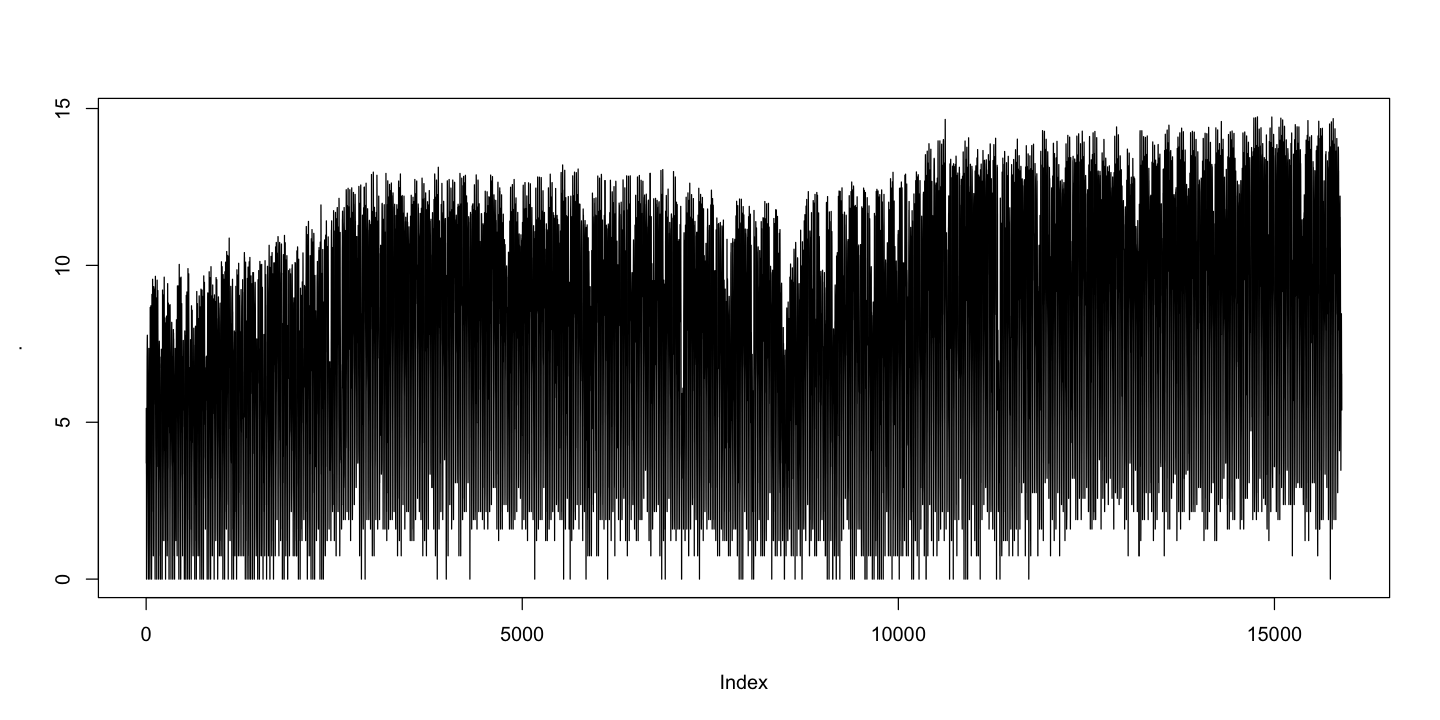

In [79]:
set_plot_dimensions()
transformed_count %>% plot(type='l')

In [126]:
#Create regressors dataframe to use in model
t = seq(1, length(transformed_count))
dat = data.frame(count=transformed_count, t, t^2,
                 train$atemp,
                 train$windspeed,
                 train$hum,
                 fourier_pairs)

In [127]:
#Fit a linear regression model
ols_fit = lm(count ~ ., data = dat)

In [128]:
summary(ols_fit)


Call:
lm(formula = count ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8209 -1.6706  0.2818  1.9014  7.8935 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.805e+00  1.695e-01  28.347  < 2e-16 ***
t                2.414e-04  1.923e-05  12.551  < 2e-16 ***
t.2             -8.441e-09  1.171e-09  -7.206 6.00e-13 ***
train.atemp      9.989e+00  2.267e-01  44.066  < 2e-16 ***
train.windspeed  1.455e+00  1.822e-01   7.990 1.44e-15 ***
train.hum       -5.295e+00  1.185e-01 -44.685  < 2e-16 ***
S1.24           -2.575e-01  2.995e-02  -8.598  < 2e-16 ***
C1.24           -5.000e-01  2.990e-02 -16.723  < 2e-16 ***
S2.24            2.409e-01  2.968e-02   8.117 5.14e-16 ***
C2.24           -2.512e-01  2.967e-02  -8.466  < 2e-16 ***
S3.24            2.403e-01  2.968e-02   8.098 6.00e-16 ***
C3.24           -3.970e-01  2.968e-02 -13.378  < 2e-16 ***
S4.24           -1.332e-01  2.967e-02  -4.488 7.23e-06 ***
C4.24           -2.518

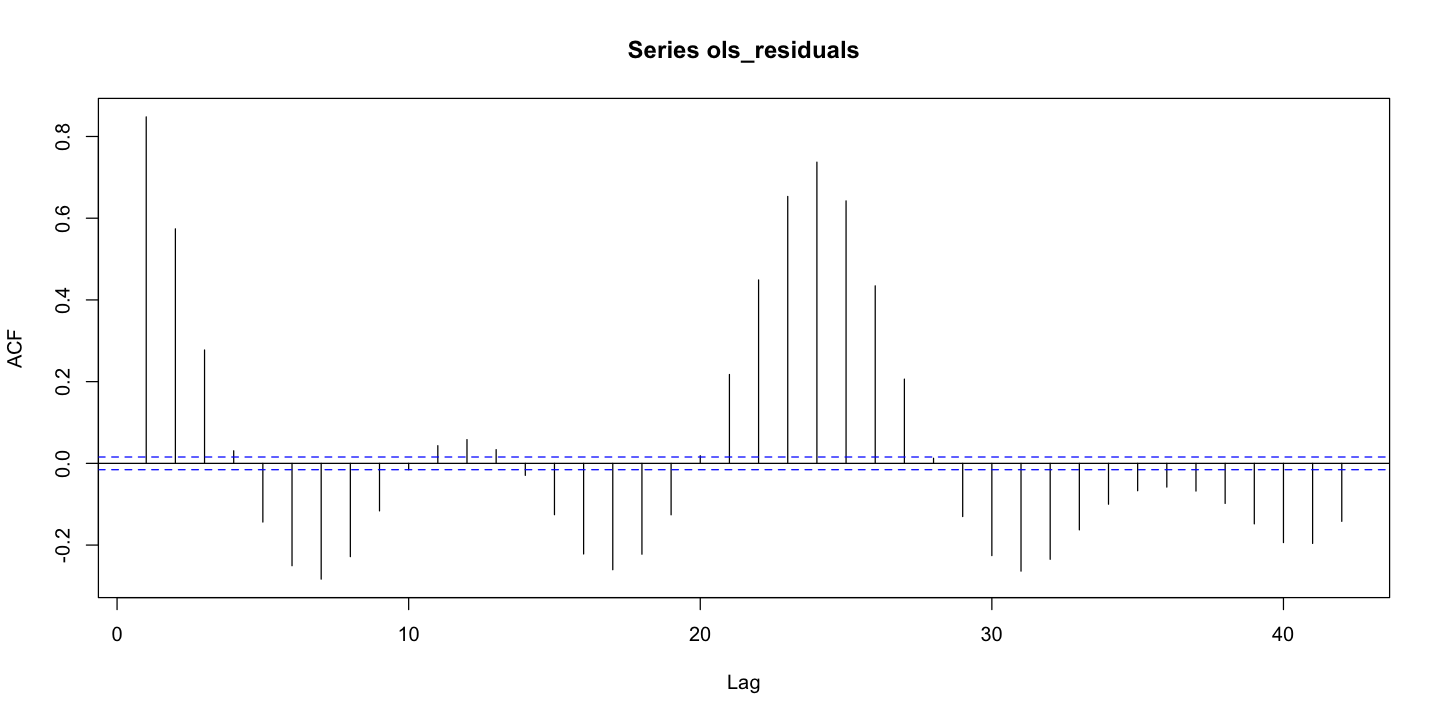

In [129]:
#Check residuals
set_plot_dimensions()
ols_residuals = residuals(ols_fit)
acf(ols_residuals)

In [130]:
#Model errrors using a SARIMA model
fit2 = auto.arima(ols_residuals, seasonal = TRUE)


	Ljung-Box test

data:  Residuals from ARIMA(3,0,3) with zero mean
Q* = 617.9, df = 4, p-value < 2.2e-16

Model df: 6.   Total lags used: 10



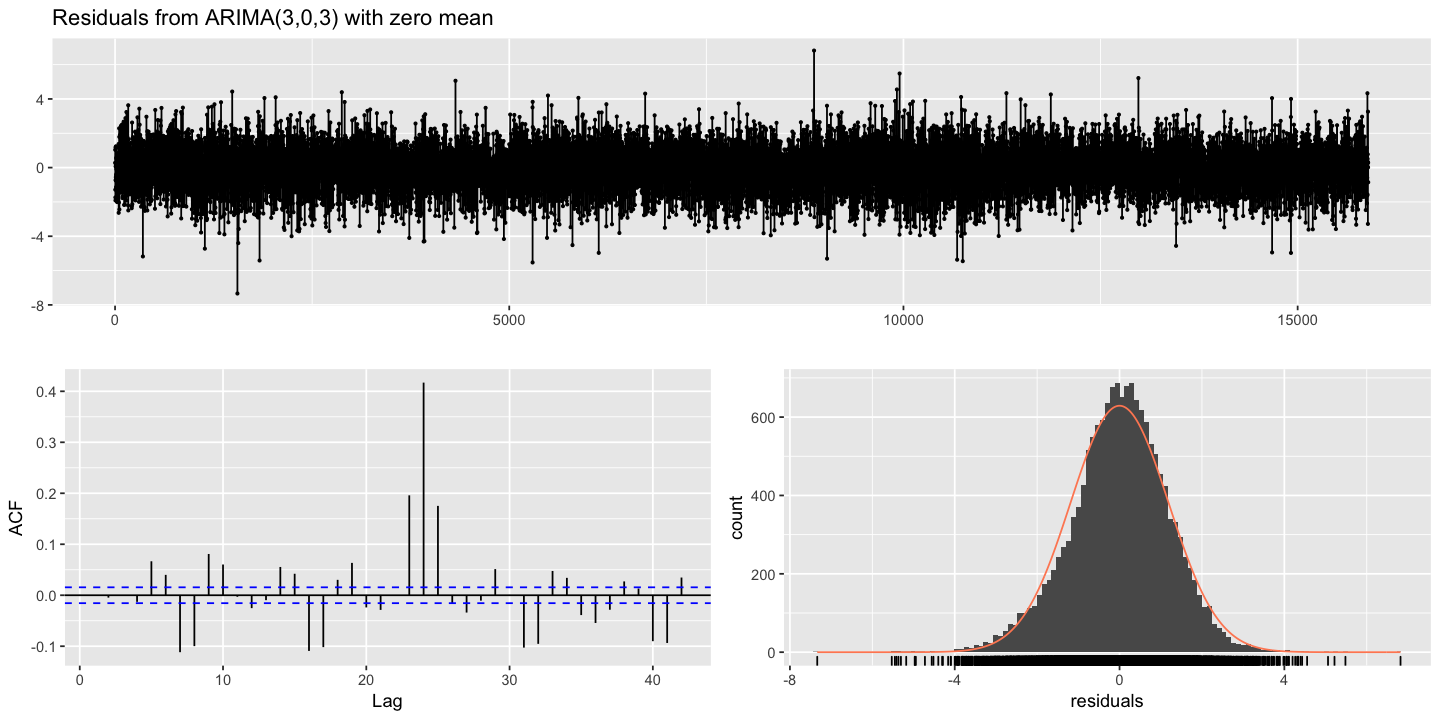

In [131]:
checkresiduals(fit2)